In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import maxwell
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

# ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

### Сгенерируйте примеры из распределения

In [62]:
#A Maxwell continuous random variable.

maxwell_rv = sts.maxwell(2, 2)
sample = maxwell_rv.rvs(100)
sample

array([3.76714246, 3.3196121 , 6.58710999, 4.0621876 , 3.48155317,
       5.86621996, 3.84369251, 5.81221576, 6.51225277, 5.14417503,
       5.34133272, 2.40281869, 3.14336309, 5.29461151, 3.75455975,
       2.67593977, 7.17835797, 6.28895633, 5.94557763, 4.58245791,
       5.50860012, 3.81366487, 5.41891068, 5.04364623, 4.94425539,
       6.66196519, 3.19015588, 5.34314579, 3.96197787, 3.45326503,
       5.78047875, 3.15825241, 3.45125871, 5.57125803, 4.39442224,
       4.2897973 , 6.27645553, 7.4820615 , 6.33578027, 4.51744556,
       3.08406535, 5.708332  , 3.96441502, 5.36144414, 6.61232918,
       4.63386798, 4.40041757, 6.14420039, 4.32549476, 4.1775832 ,
       3.48366635, 5.73180123, 3.83827607, 5.39636765, 4.42531489,
       6.59359306, 5.22336624, 6.35484139, 5.29409686, 5.58861526,
       5.01589554, 5.25768428, 4.8266657 , 4.85352977, 3.38003976,
       4.78877661, 3.24904563, 6.03515956, 4.37862124, 6.00139201,
       8.79197786, 7.46352409, 5.33238831, 4.56642335, 3.70385

In [58]:
sample.dtype

dtype('float64')

In [59]:
real_mean = maxwell_rv.mean() # настоящее среднее случайной величины
real_mean

5.191538243211461

In [60]:
real_var = maxwell_rv.var() # настоящая дисперсия случайной величины
real_var

1.8140836421186979

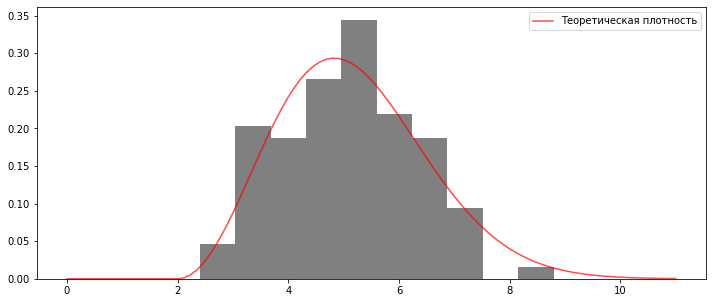

In [92]:
plt.figure(figsize=(12,5))
plt.hist(sample, density=True, color = 'grey')
x = np.linspace(0,11,100)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.7, color='red')
plt.legend()

#итог становится очень близок к нормальному распределению

In [72]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

5.086764140998906
1.5753465925680723


# Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки

In [94]:
a = 1
b = 100
maxwell_rv = sts.maxwell(a, b-a)
maxwell_rv.rvs(20)

array([ 64.39282559, 162.57472775, 143.49753765,  67.24545163,
       166.5342738 ,  90.03794966, 196.22960051, 239.11354495,
        70.30643351,  97.56672856, 131.91242159,  73.45450753,
       147.3458868 ,  67.16369432, 189.15391292, 194.75226871,
       221.32719788, 168.97364268, 163.99577914, 271.34715271])

In [97]:
N = 200
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(maxwell_rv.rvs(N)))

(array([0.00080988, 0.00809882, 0.00647905, 0.01943716, 0.01700752,
        0.02915574, 0.03158539, 0.05426208, 0.08098818, 0.06641031,
        0.10285499, 0.07288936, 0.0801783 , 0.06317078, 0.05507196,
        0.04940279, 0.02429645, 0.01862728, 0.01538775, 0.00809882,
        0.00404941, 0.00080988, 0.00080988]),
 array([145.43307698, 146.66782507, 147.90257316, 149.13732125,
        150.37206934, 151.60681743, 152.84156551, 154.0763136 ,
        155.31106169, 156.54580978, 157.78055787, 159.01530596,
        160.25005405, 161.48480213, 162.71955022, 163.95429831,
        165.1890464 , 166.42379449, 167.65854258, 168.89329066,
        170.12803875, 171.36278684, 172.59753493, 173.83228302]),
 <a list of 23 Patch objects>)

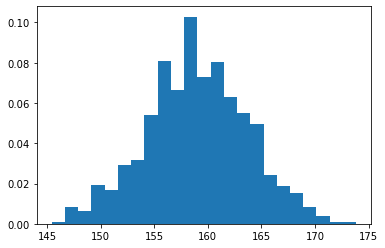

In [98]:
plt.hist(means, density=True, bins='auto')

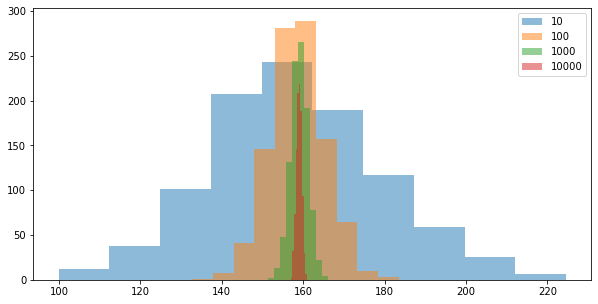

In [100]:
plt.figure(figsize=(10,5))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(maxwell_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

#чем больше значений - тем точнее наша "нормальная" картинка

In [126]:
N = 5
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(maxwell_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [127]:
maxwell_rv.mean() #среднее

158.98114303896736

In [128]:
maxwell_rv.var() #дисперсия

4444.958444101339

In [129]:
maxwell_rv.std() #стандартное отклонение 

66.67052155264228

[]

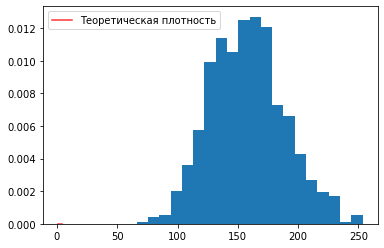

In [130]:
norm_rv = sts.norm(loc=maxwell_rv.mean(), scale=maxwell_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=20)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.8, color='red')
plt.legend()
plt.plot()

#здесь должно было достигаться примерное соответствие с нормальным распределением - но почему-то этого не вышло, не могу понять, от чего


# Вывод
Выбранное распределение на этапе рандомной генерации среднего показало, что не достигает примерного соответствия с нормальным распределением. Если смотреть на подсчет доверительного интервала для среднего ниже, то можно увидеть, что данные между собой очень близки, однако среднее не всегда попадает в этот доверительным интервал - возможно с этим связано несоответствие с нормальным распределением. 

In [145]:
data = maxwell_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * maxwell_rv.std() / np.sqrt(N), np.mean(data) + 1.96 * maxwell_rv.std() / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

print("Данные оказались между собой очень близки")

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [146.09600012691533, 262.97457766398054] 
Доверительный интервал для среднего по цпт интервальная оценка: (146.33904591996952, 262.73153187092635) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (200.811446096113, 208.25913169478287) 
Данные оказались между собой очень близки


# Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [146]:
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [147]:
#фильтр для последней колонки churn

churn = df[df['churn'] == True]['total day calls']
notChurn = df[df['churn'] == False]['total day calls']

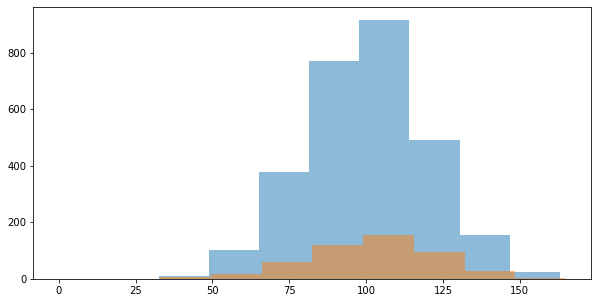

In [149]:
#строим гистограмму для каждого значения ушел/не ушел на основе значения TDC
plt.figure(figsize=(10,5))
plt.hist(notChurn, alpha = 0.5)
plt.hist(churn, alpha = 0.5);

In [151]:
data = churn
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * np.sqrt(np.var(data)/len(data)), np.mean(data) + 1.96 * np.sqrt(np.var(data)/len(data))) 
)

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.41262047786196, 103.2581869755542] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [152]:
data = notChurn
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * np.sqrt(np.var(data)/len(data)), np.mean(data) + 1.96 * np.sqrt(np.var(data)/len(data))) 
)

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.55630252675441, 101.01001326271928] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


# Вывод
По итогам расчета, интервалы с известной дисперсией и интервалы, подсчитанные методом ZN, оказались математически близки